# Preprocess steamid, publisherclass, and aicontent Columns

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [84]:
df=pd.read_csv('../../data/raw/gamalytic_steam_games.csv')

In [85]:
df.shape

(93338, 6)

In [86]:
df.head()

,steamId,price,copiesSold,publisherClass,reviewScore,aiContent
0,730,0.0,302158048,AAA,87,NaN
1,570,0.0,212896574,AAA,82,NaN
2,578080,0.0,161971233,AAA,59,NaN
3,440,0.0,99060457,AAA,90,NaN
4,1172470,0.0,67554185,AAA,67,NaN


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93338 entries, 0 to 93337
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   steamId         93338 non-null  int64  
 1   price           93338 non-null  float64
 2   copiesSold      93338 non-null  int64  
 3   publisherClass  93338 non-null  object 
 4   reviewScore     93338 non-null  int64  
 5   aiContent       0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.3+ MB


In [88]:
df.duplicated().sum()

np.int64(0)

# publisher class column

In [89]:
df['publisherClass'].value_counts()

publisherClass
Hobbyist    52161
Indie       37304
AA           2844
AAA          1029
Name: count, dtype: int64

C:\Users\maria\AppData\Local\Temp\ipykernel_13324\1774494533.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')


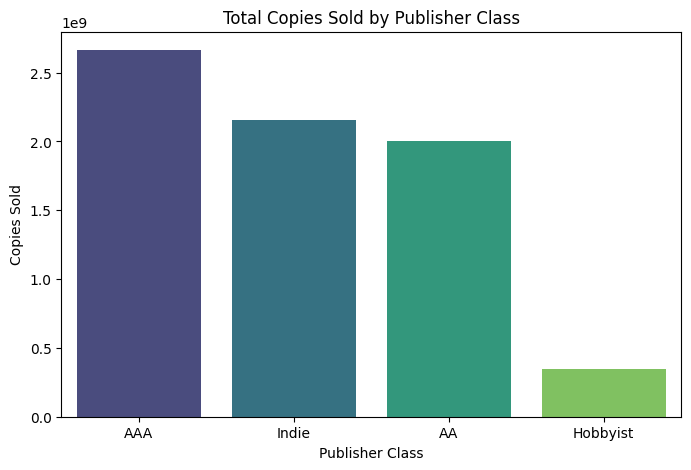

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped = df.groupby('publisherClass')['copiesSold'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')
plt.title('Total Copies Sold by Publisher Class')
plt.xlabel('Publisher Class')
plt.ylabel('Copies Sold')
plt.show()


 As dataset rows equals 93338 i think we can replace AA and AAA columns with only one column for others and this also may handle unseen data in testing

In [91]:
df['publisherClass'] = df['publisherClass'].replace(['AA', 'AAA'], 'Other')
print(df['publisherClass'].value_counts())

publisherClass
Hobbyist    52161
Indie       37304
Other        3873
Name: count, dtype: int64


# Using one hot encoding

In [92]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse_output=False)
encoded_data = encoder.fit_transform(df[['publisherClass']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['publisherClass']))

In [93]:
df = pd.concat([df, encoded_df], axis=1)

In [94]:
df.drop('publisherClass', axis=1, inplace=True)

In [95]:
df.tail()

,steamId,price,copiesSold,reviewScore,aiContent,publisherClass_Indie,publisherClass_Other
93333,582110,7.99,0,0,NaN,0.0,0.0
93334,514510,9.99,0,0,NaN,1.0,0.0
93335,497380,14.99,0,0,NaN,1.0,0.0
93336,456430,1.99,0,0,NaN,1.0,0.0
93337,3167760,4.99,0,0,NaN,0.0,0.0


# Dropping aicontent column as it contain 100% NULL values

In [96]:
df.drop('aiContent', axis=1, inplace=True)